# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [73]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [74]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1:4])

# TODO: How many unique classes/labels there are in the dataset.
import csv
with open('signnames.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    ClassId = []
    SignName = []
    for row in readCSV:
        cId = row[0]
        sNa = row[1]

        ClassId.append(cId)
        SignName.append(sNa)
ClassId = ClassId[1:]
SignName = SignName[1:]
n_classes = len(ClassId)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Label #25
Road work


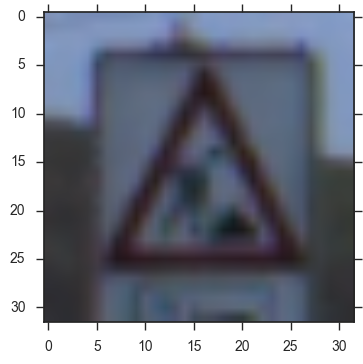

In [76]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# pretty graphs
import seaborn as sns
sns.set_style("ticks")

# Plot random image from the training set and print label id and name
import numpy as np
rand_sample = np.random.randint(0,n_train)

plt.imshow(X_train[rand_sample])
print("Label #%s\n%s" %(y_train[rand_sample], SignName[y_train[rand_sample]]))

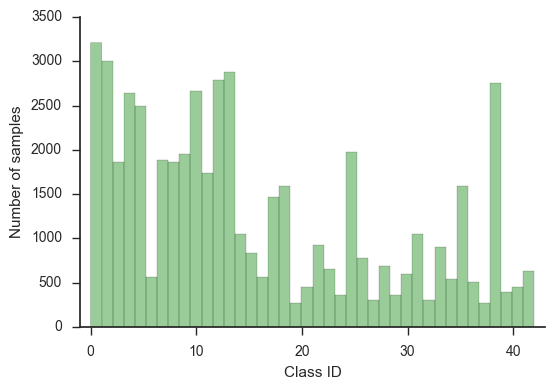

In [77]:
# Plot the distribution of the traffic sign classes
fig = plt.figure()
fig.clf()
ax = fig.add_subplot(111)

sns.distplot(np.hstack([y_train, y_test]), kde=0, color="g", ax=ax)

ax.set_xlim(-1,43)

ax.set_xlabel("Class ID")
ax.set_ylabel("Number of samples")

sns.despine()
plt.draw()
plt.show()

<a id='ordered_data'></a>

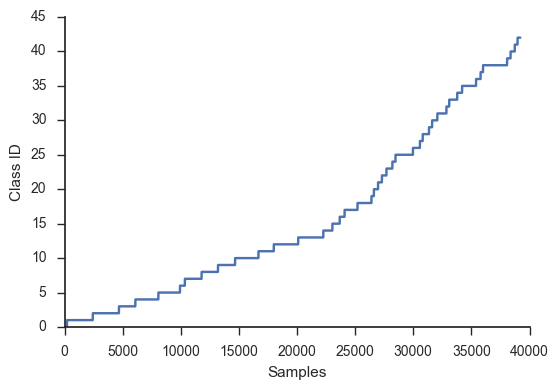

In [78]:
# Plot training data labels
fig = plt.figure()
fig.clf()
ax = fig.add_subplot(111)

ax.plot(y_train)

ax.set_xlabel("Samples")
ax.set_ylabel("Class ID")

sns.despine()
plt.draw()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [79]:
### Preprocess the data

# Convert to grayscale
from skimage import color
X_test = color.rgb2gray(X_test);
X_train = color.rgb2gray(X_train);

X_test0 = np.zeros((len(X_test), 32, 32, 1))
X_test0[:,:,:,0] = X_test
X_test = X_test0

X_train0 = np.zeros((len(X_train), 32, 32, 1))
X_train0[:,:,:,0] = X_train
X_train = X_train0

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
The images are converted to greyscale. [This was reported](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) to (surprisingly) increase the accuracy. Indeed, by simply converting to greyscale, the prediction accuracy on the validation set went from 95% to 97%.

In [80]:
# Normalise data
X_train_m = np.mean(X_train)
X_train_s = np.std(X_train)
X_test    = (X_test-X_train_m)/X_train_s
X_train   = (X_train-X_train_m)/X_train_s

In [81]:
# Shuffle the training set
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# Create the validation dataset
from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The images are normalised to zero mean and unit variance across the data set (not individually). The same normalisation used on the training set was applied also to the test set.

The German Traffic Sign Dataset does not provide the validation dataset upon which test the prediction accuracy at each epoch. Therefore, the 20% of the training dataset is saved for validation purpose.

The training data is ordered (see [plot](#ordered_data)) and this is a problem when creating batches. The `shuffle` function randomises the order of the samples.

In [82]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def makeWeights(shape, mean, stddev):
    return tf.Variable(tf.truncated_normal(shape=shape, mean=mean, stddev=stddev))

def makeBiases(length):
    return tf.Variable(tf.zeros(length))

def convolve(x, W, strides, padding, b):
    return tf.nn.conv2d(x, W, strides=strides, padding=padding) + b

def activate(conv):
    return tf.nn.elu(conv)

def pooling(conv, kernel, strides, padding):
    return tf.nn.max_pool(conv, ksize=kernel, strides=strides, padding=padding)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # First convolutional layer
    # Input: 32x32x1. Output = 28x28x6.
    conv1_W = makeWeights((5, 5, 1, 6), mu, sigma)
    conv1_b = makeBiases(6)
    conv1   = convolve(x, conv1_W, [1, 1, 1, 1], 'VALID', conv1_b)
    conv1   = activate(conv1)

    # First pooling
    # Input = 28x28x6. Output = 14x14x6.
    conv1 = pooling(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

    # Second convolutional layer
    # Output = 10x10x16.
    conv2_W = makeWeights((5, 5, 6, 16), mu, sigma)
    conv2_b = makeBiases(16)
    conv2   = convolve(conv1, conv2_W, [1, 1, 1, 1], 'VALID', conv2_b)
    conv2   = activate(conv2)

    # Second pooling
    # Input = 10x10x16. Output = 5x5x16.
    conv2 = pooling(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    flatted = flatten(conv2)
    
    # First fully connected layer 1
    # Input = 400. Output = 120.
    fully1_W = makeWeights((400, 120), mu, sigma)
    fully1_b = makeBiases(120)
    fully1   = tf.matmul(flatted, fully1_W) + fully1_b
    fully1   = activate(fully1)

    # Fully connected layer 2
    # Input = 120. Output = 84.
    fully2_W  = makeWeights((120, 84), mu, sigma)
    fully2_b  = makeBiases(84)
    fully2    = tf.matmul(fully1, fully2_W) + fully2_b
    fully2    = activate(fully2)

    # Fully connected layer 3
    # Input = 84. Output = 43.
    fully3_W  = makeWeights((84, 43), mu, sigma)
    fully3_b  = makeBiases(43)

    return tf.matmul(fully2, fully3_W) + fully3_b

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The architecture (LeNet-5) was taken from the previous lesson on MNIST dataset classification.
This consists of two convolutional layers linked by pooling layers. The pooling is done by means of `max_pool`. Conversely to the original LeNet architecture, the exponential linear activation function was used, as this [outperform ReLU](http://publications.lib.chalmers.se/records/fulltext/238914/238914.pdf) in learning speed.

In [83]:
### Train your model here.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# learning rate
rate = 1e-3

EPOCHS = 10
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# get the softmax probabilities
softmax = tf.nn.softmax(logits)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [84]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.872

EPOCH 2 ...
Validation Accuracy = 0.931

EPOCH 3 ...
Validation Accuracy = 0.951

EPOCH 4 ...
Validation Accuracy = 0.965

EPOCH 5 ...
Validation Accuracy = 0.969

EPOCH 6 ...
Validation Accuracy = 0.972

EPOCH 7 ...
Validation Accuracy = 0.977

EPOCH 8 ...
Validation Accuracy = 0.977

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.980

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I used the `AdamOptimizer` function on batches of 64 samples in size for a total of 10 epochs. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The batch size was imposed by my computer memory limits.
The epoch size was first set to 25, then I noticed that around 12 the accuracy on the training set was maximised; thus, `EPOCH=10` was taken not to overfit the training data.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

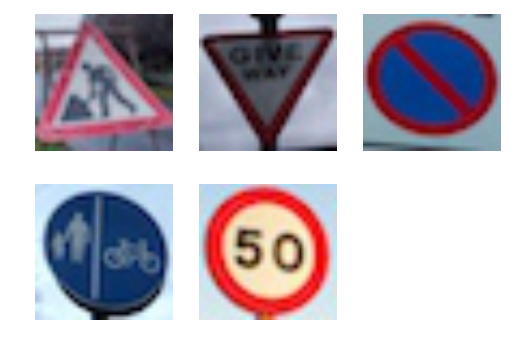

In [85]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

sns.set_style("white")
fig = plt.figure()
fig.clf()

# initialise the new set of five 32x32 RGB test images
X_new = np.zeros((5, 32, 32, 3))

i = 0
for img in os.listdir("my-signs"): # read images
    ax = fig.add_subplot(2,3,i+1)  # plot
    
    im = plt.imread("my-signs/%s"%img, format='jpeg')
    plt.axis('off')
    plt.imshow(im)
    
    X_new[i, :, :, :] = im # store images
    
    i += 1


In [86]:
# convert to grayscale
X_new = color.rgb2gray(X_new);

X_new0 = np.zeros((len(X_new), 32, 32, 1))
X_new0[:,:,:,0] = X_new
X_new = X_new0

# normalise images
X_new = (X_new-X_train_m)/X_train_s

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The traffic signs are from UK (apart the fifth, from the internet) so they may be different from the German ones. Indeed, I was not able to find the right category for each sign in the attached file.

In [87]:
### Run the predictions here.
# Test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.904


In [88]:
y_new = np.array([25, 13, 17, 27, 2]) # these are the most similar labels I could find on the list
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_new, y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.400


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


## **Answer:**
On the test dataset the accuracy is of the 90.4% whereas the CNN classifies correctly 2 out of 5 captured pictures. This is mainly because there are not training samples for all the signs in the `captured_images` dataset. Indeed, the only two correctly classified are the 50km/h speed limit and the yeld sign.

In [97]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top_k = tf.nn.top_k(softmax, 5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    output = sess.run(top_k, feed_dict={x:X_new})

In [139]:
i = 0
for sign in output[1]:
    print("The sign number %s was classified as %s"%(i, SignName[sign[0]]))
    i+=1

The sign number 0 was classified as Roundabout mandatory
The sign number 1 was classified as Yield
The sign number 2 was classified as Ahead only
The sign number 3 was classified as Priority road
The sign number 4 was classified as Speed limit (50km/h)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The model correctly predict the sign to be a 50km/h speed limit.

In [129]:
top_k = tf.nn.top_k(softmax, 5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    output = sess.run(top_k, feed_dict={x:X_new})

In [141]:
# yeld sign
print("For the 2nd sign, the most certain prediction is %s" %SignName[output[1][1][0]])
print("For the 2nd sign, a less certain prediction is %s" %SignName[output[1][1][-1]])

# 50km/h limit
print("\nFor the 5th sign, the most certain prediction is %s" %SignName[output[1][-1][0]])
print("For the 5th sign, a less certain prediction is %s" %SignName[output[1][-1][-1]])

For the 2nd sign, the most certain prediction is Yield
For the 2nd sign, a less certain prediction is Speed limit (60km/h)

For the 5th sign, the most certain prediction is Speed limit (50km/h)
For the 5th sign, a less certain prediction is Speed limit (70km/h)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.